<a href="https://colab.research.google.com/github/jenishaprincess/DIA-RET/blob/main/RF_001RESNET_50_70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'

In [3]:

# RESNET
model_b7 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
# Function to extract features from an image using resnet
def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Adjusted target size for resnet
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b7.predict(img_data)
    return features

In [5]:
# Load images and extract features for resnet
x_train_b7, y_train_b7 = [], []
x_test_b7, y_test_b7 = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_train_b7.append(features)
        y_train_b7.append(i)

1/1 [==============================] - 0s 208ms/step


In [6]:
# Load images and extract features for resnet
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_test_b7.append(features)
        y_test_b7.append(i)

1/1 [==============================] - 0s 211ms/step


In [7]:
# Flatten the features for resnet
x_train_flat_b7 = np.array([feature.flatten() for feature in x_train_b7])
x_test_flat_b7 = np.array([feature.flatten() for feature in x_test_b7])

In [8]:
# Scale the input features to the range [0, 1] for resnet
scaler_b7 = MinMaxScaler()
x_train_scaled_b7 = scaler_b7.fit_transform(x_train_flat_b7)
x_test_scaled_b7 = scaler_b7.transform(x_test_flat_b7)

# Ensure non-negative values for B7
min_value_b7 = np.min(np.concatenate([x_train_scaled_b7, x_test_scaled_b7]))
x_train_scaled_non_negative_b7 = x_train_scaled_b7 - min_value_b7
x_test_scaled_non_negative_b7 = x_test_scaled_b7 - min_value_b7

Training Random Forest (max_features='sqrt') for resnet...
Performance metrics for Random Forest (max_features='sqrt') with resnet:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       135
           1       0.98      0.88      0.93       135
           2       0.89      0.80      0.84       135
           3       0.80      0.86      0.83       135
           4       0.91      0.89      0.90       135

    accuracy                           0.86       675
   macro avg       0.87      0.86      0.86       675
weighted avg       0.87      0.86      0.86       675

True Positives: 583
True Negatives: 2608
False Positives: 92
False Negatives: 92
Accuracy: 0.9454814814814815
Precision: 0.8697934852033213
Specificity: 0.965925925925926
Sensitivity: 0.8637037037037036
F1 Score: 0.8648869250071949
Recall: 0.8637037037037036



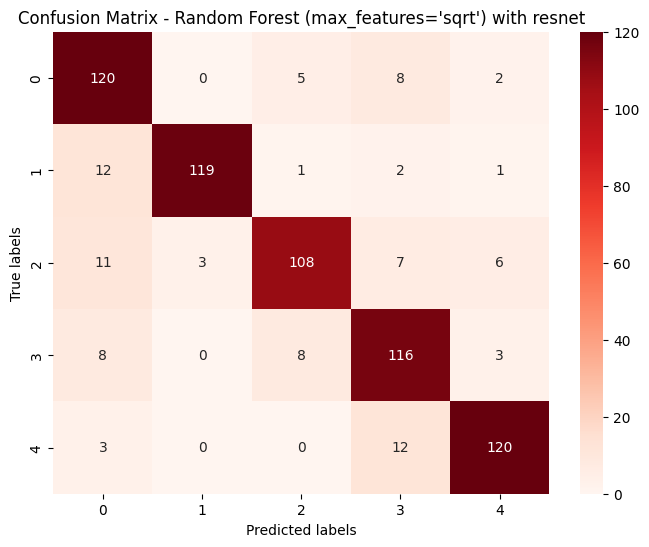

Training Random Forest (max_features='auto') for resnet...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Performance metrics for Random Forest (max_features='auto') with resnet:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       135
           1       0.98      0.88      0.93       135
           2       0.89      0.80      0.84       135
           3       0.80      0.86      0.83       135
           4       0.91      0.89      0.90       135

    accuracy                           0.86       675
   macro avg       0.87      0.86      0.86       675
weighted avg       0.87      0.86      0.86       675

True Positives: 583
True Negatives: 2608
False Positives: 92
False Negatives: 92
Accuracy: 0.9454814814814815
Precision: 0.8697934852033213
Specificity: 0.965925925925926
Sensitivity: 0.8637037037037036
F1 Score: 0.8648869250071949
Recall: 0.8637037037037036



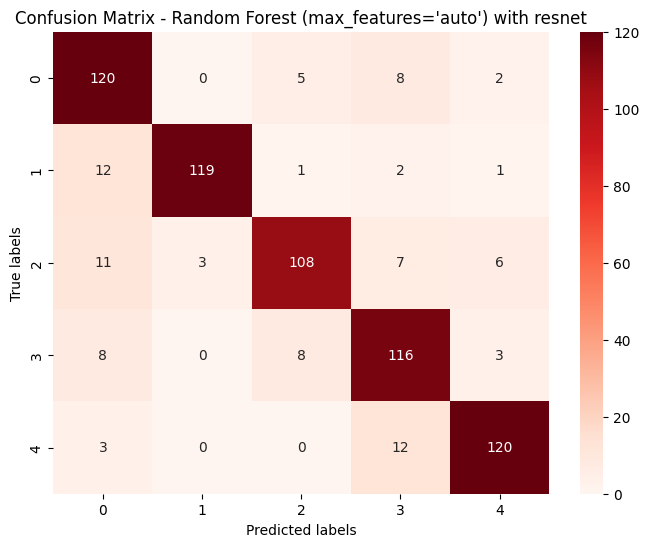

Training Random Forest (max_features='log2') for resnet...
Performance metrics for Random Forest (max_features='log2') with resnet:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       135
           1       0.94      0.89      0.92       135
           2       0.84      0.76      0.79       135
           3       0.81      0.83      0.82       135
           4       0.90      0.89      0.90       135

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675

True Positives: 573
True Negatives: 2598
False Positives: 102
False Negatives: 102
Accuracy: 0.9395555555555556
Precision: 0.8523371542085483
Specificity: 0.9622222222222222
Sensitivity: 0.8488888888888889
F1 Score: 0.8492749802833766
Recall: 0.8488888888888889



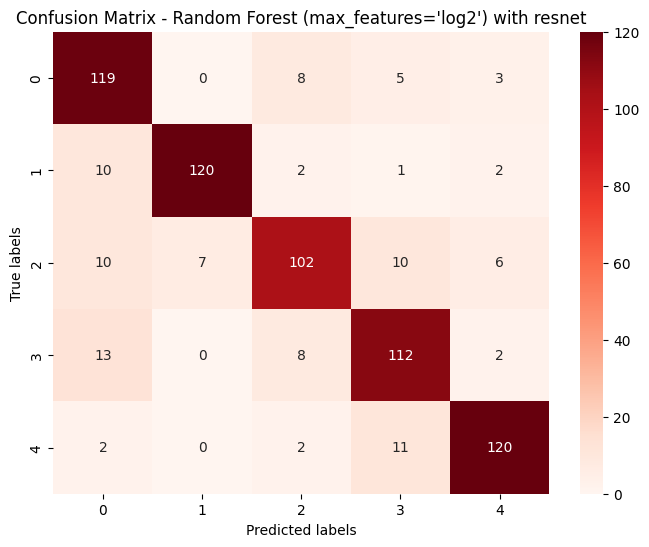

In [9]:
# Define Random Forest classifiers
classifiers_rf = {
    "Random Forest (max_features='sqrt')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42),
    "Random Forest (max_features='auto')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42),
    "Random Forest (max_features='log2')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42),
}
# Train Random Forest classifiers
for clf_name, clf_rf in classifiers_rf.items():
    print(f"Training {clf_name} for resnet...")
    # Train classifier
    clf_rf.fit(x_train_scaled_non_negative_b7, y_train_b7)
    # Predict on test set
    y_pred_rf = clf_rf.predict(x_test_scaled_non_negative_b7)
    # Print performance metrics for Random Forest
    print(f'Performance metrics for {clf_name} with resnet:')
    print('Classification Report:')
    print(classification_report(y_test_b7, y_pred_rf))
    # Compute confusion matrix
    cm_rf = confusion_matrix(y_test_b7, y_pred_rf)
    # Compute TP, TN, FP, FN for each class
    TP_rf = np.diag(cm_rf)
    FP_rf = np.sum(cm_rf, axis=0) - TP_rf
    FN_rf = np.sum(cm_rf, axis=1) - TP_rf
    num_classes_rf = cm_rf.shape[0]
    TN_rf = []
    for i in range(num_classes_rf):
        temp_rf = np.delete(cm_rf, i, 0)   # delete ith row
        temp_rf = np.delete(temp_rf, i, 1)  # delete ith column
        TN_rf.append(sum(sum(temp_rf)))
    # Compute overall TP, TN, FP, FN
    overall_TP_rf = np.sum(TP_rf)
    overall_TN_rf = np.sum(TN_rf)
    overall_FP_rf = np.sum(FP_rf)
    overall_FN_rf = np.sum(FN_rf)
    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy_rf = (overall_TP_rf + overall_TN_rf) / (overall_TP_rf + overall_TN_rf + overall_FP_rf + overall_FN_rf)
    precision_rf = metrics.precision_score(y_test_b7, y_pred_rf, average='macro')
    recall_rf = metrics.recall_score(y_test_b7, y_pred_rf, average='macro')
    f1_rf = metrics.f1_score(y_test_b7, y_pred_rf, average='macro')
    specificity_rf = overall_TN_rf / (overall_TN_rf + overall_FP_rf)
    # Print performance metrics
    print(f'True Positives: {overall_TP_rf}')
    print(f'True Negatives: {overall_TN_rf}')
    print(f'False Positives: {overall_FP_rf}')
    print(f'False Negatives: {overall_FN_rf}')
    print(f'Accuracy: {accuracy_rf}')
    print(f'Precision: {precision_rf}')
    print(f'Specificity: {specificity_rf}')
    print(f'Sensitivity: {recall_rf}')
    print(f'F1 Score: {f1_rf}')
    print(f'Recall: {recall_rf}\n')
    # Plot confusion matrix
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with resnet')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

